In [23]:
import numpy as np
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import math
import array
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

In [24]:
train = np.loadtxt('training.txt')
validate = np.loadtxt('validate.txt')
x_t = np.arange(0,3,0.001)
x_v = np.arange(0,3,0.003)
N = train.shape[0]
Nv = validate.shape[0]

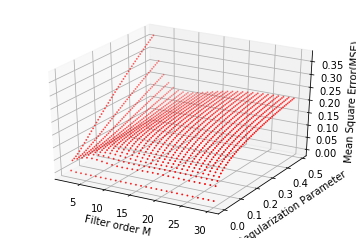

In [25]:
lamd = np.arange(0,0.5,0.01)
MSE_v = np.zeros(shape=(50,32))
x = []
y = []
z = []
for m in range(2,31):
    for l in range(50):
        X = np.zeros(shape=(m,N-m))
        Y = train[m:N]
        for i in range(0,N-m):
            temp = train[i:i+m]
            X[:,i] = temp[::-1]
        r = (X@X.T)/(N-m)
        R = r+lamd[l]*np.identity(m)
        P = (X@Y)/(N-m)
        W = np.linalg.inv(R)@P
        Xv = np.zeros(shape=(m,Nv-m))
        Yv = validate[m:Nv]
        for j in range(0,Nv-m):
            temp = validate[j:j+m]
            Xv[:,j] = temp[::-1]
        yv = W.T@Xv
        MSE = np.zeros(shape=(Nv-m,3))
        for n in range(0,Nv-m):
            MSE[n] = (Yv[n] - yv[n])**2
        MSE_v[l,m] = math.sqrt(MSE.sum()/(Nv-m))
        x.append(m)
        y.append(lamd[l])
        z.append(math.sqrt(MSE.sum()/(Nv-m)))
ax = plt.subplot(projection='3d')
ax.scatter(x,y,z,c='r',s=0.8)
ax.set_xlabel('Filter order M')
ax.set_ylabel('Regularization Parameter')
ax.set_zlabel('Mean Square Error(MSE)')
plt.show()